## Цель работы:

Изучение алгоритмов и методов кластеризации на практике.

**Вариант:** 16 (1 вариант medical_diagnosis)

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metric

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

## Ход работы
### Часть 1

Функция для создания набора данных

In [3]:
def make_data(n, seed):
    np.random.seed(seed)

    shift_matrix = np.array([[3, 3], 
                          [6, 9], 
                          [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

После чего с помощью этой функции был сформирован набор данных

In [4]:
n = 70
seed = 0

df_synthetic = make_data(n, seed)

print(f'Размер датасета: {df_synthetic.shape}')
df_synthetic.head()

Размер датасета: (210, 2)


,x,y
203,155.718452,1.383267
77,142.340326,4.689576
183,162.181698,0.691763
53,36.387356,2.163193
201,170.932284,1.900149


Отображение полученных данных

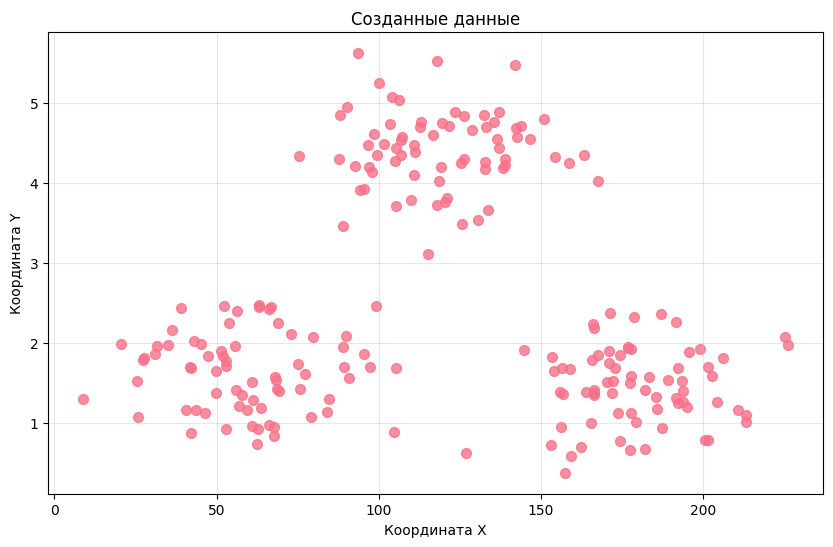

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df_synthetic['x'], df_synthetic['y'], alpha=0.8, s=50)
plt.xlabel("Координата X")
plt.ylabel("Координата Y")
plt.title("Созданные данные")
plt.grid(True, alpha=0.3)
plt.show()


Стандартизация данных

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_synthetic)

df_scaled = pd.DataFrame(scaled_data, columns=['x', 'y'])
df_scaled.head()

,x,y
0,0.692746,-0.775668
1,0.438735,1.523366
2,0.815464,-1.256503
3,-1.573000,-0.233348
4,0.981611,-0.416255


---

Kmeans для 3 кластеров

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(scaled_data)
df_scaled['cluster'] = labels
silhouette = metric.silhouette_score(scaled_data, labels)

print(f'Количество кластеров: 3')
print(f'Silhouette Score: {silhouette:.4f}')
print(f'Inertia: {kmeans.inertia_:.2f}')

df_scaled.head()

Количество кластеров: 3
Silhouette Score: 0.6983
Inertia: 53.41


,x,y,cluster
0,0.692746,-0.775668,1
1,0.438735,1.523366,2
2,0.815464,-1.256503,1
3,-1.573000,-0.233348,0
4,0.981611,-0.416255,1


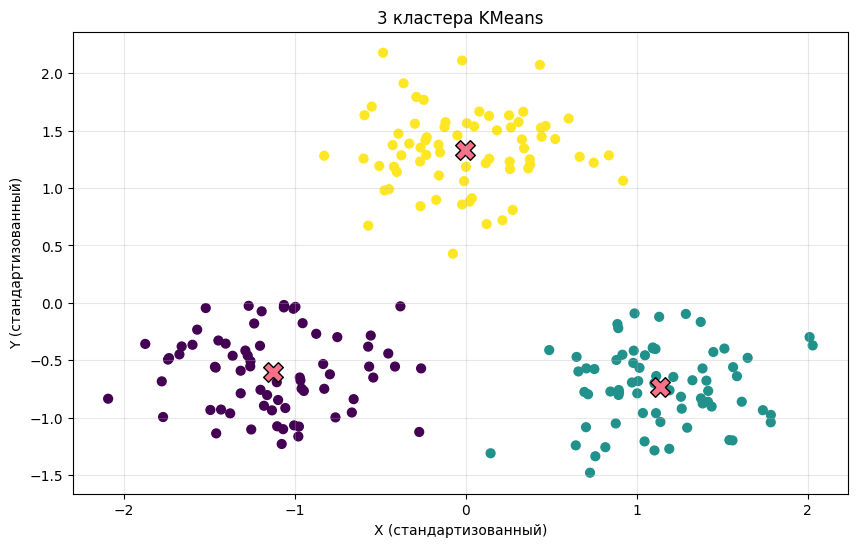

In [8]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['x'], df_scaled['y'], c=df_scaled['cluster'], s=40)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, edgecolor='black')
plt.grid(True, alpha=0.3)
plt.xlabel("X (стандартизованный)")
plt.ylabel("Y (стандартизованный)")
plt.title("3 кластера KMeans")

plt.show()


Видим, что алгоритм отлично разделил данные на 3 кластера, что соответствует истинному разбиению. Silhouette Score высокий, что говорит о качественной кластеризации.

Kmeans для 2 кластеров

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(scaled_data)
df_scaled['cluster'] = labels
silhouette = metric.silhouette_score(scaled_data, labels)

print(f'Количество кластеров: 2')
print(f'Silhouette Score: {silhouette:.4f}')
print(f'Inertia: {kmeans.inertia_:.2f}')

df_scaled.head()

Количество кластеров: 2
Silhouette Score: 0.4550
Inertia: 246.81


,x,y,cluster
0,0.692746,-0.775668,1
1,0.438735,1.523366,1
2,0.815464,-1.256503,1
3,-1.573000,-0.233348,0
4,0.981611,-0.416255,1


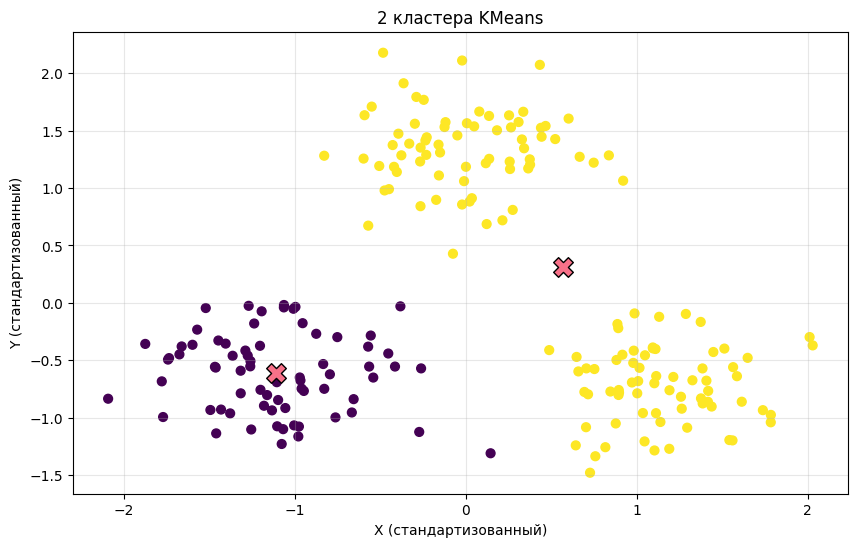

In [10]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['x'], df_scaled['y'], c=df_scaled['cluster'], s=40)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, edgecolor='black')
plt.grid(True, alpha=0.3)
plt.xlabel("X (стандартизованный)")
plt.ylabel("Y (стандартизованный)")
plt.title("2 кластера KMeans")

plt.show()


При k=2 алгоритм объединил некоторые группы, Silhouette Score ниже чем при k=3.

Kmeans для 4 кластеров

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(scaled_data)
df_scaled['cluster'] = labels
silhouette = metric.silhouette_score(scaled_data, labels)

print(f'Количество кластеров: 4')
print(f'Silhouette Score: {silhouette:.4f}')
print(f'Inertia: {kmeans.inertia_:.2f}')

df_scaled.head()

Количество кластеров: 4
Silhouette Score: 0.5800
Inertia: 46.03


,x,y,cluster
0,0.692746,-0.775668,1
1,0.438735,1.523366,2
2,0.815464,-1.256503,1
3,-1.573000,-0.233348,0
4,0.981611,-0.416255,1


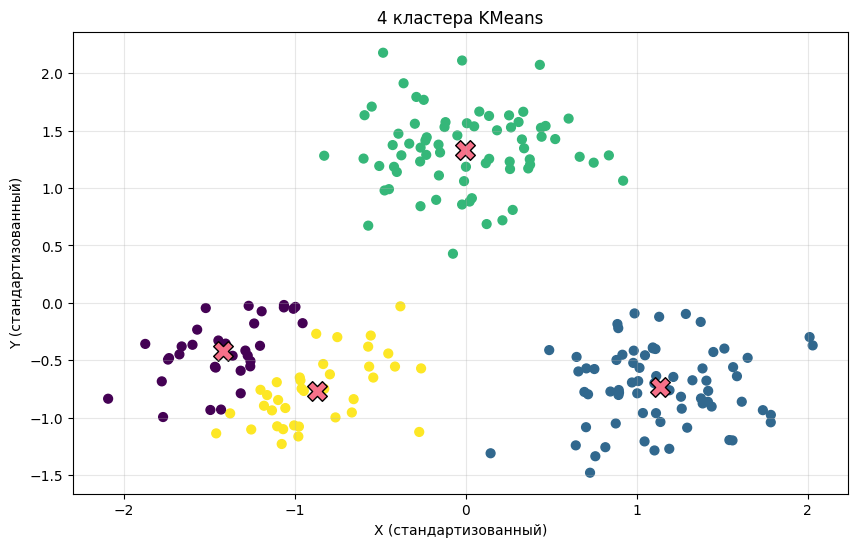

In [12]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['x'], df_scaled['y'], c=df_scaled['cluster'], s=40)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, edgecolor='black')
plt.grid(True, alpha=0.3)
plt.xlabel("X (стандартизованный)")
plt.ylabel("Y (стандартизованный)")
plt.title("4 кластера KMeans")

plt.show()

При k=4 один из истинных кластеров разбился на 2 части, Silhouette Score тоже ниже чем при k=3.

---

Был построен график по методу локтя

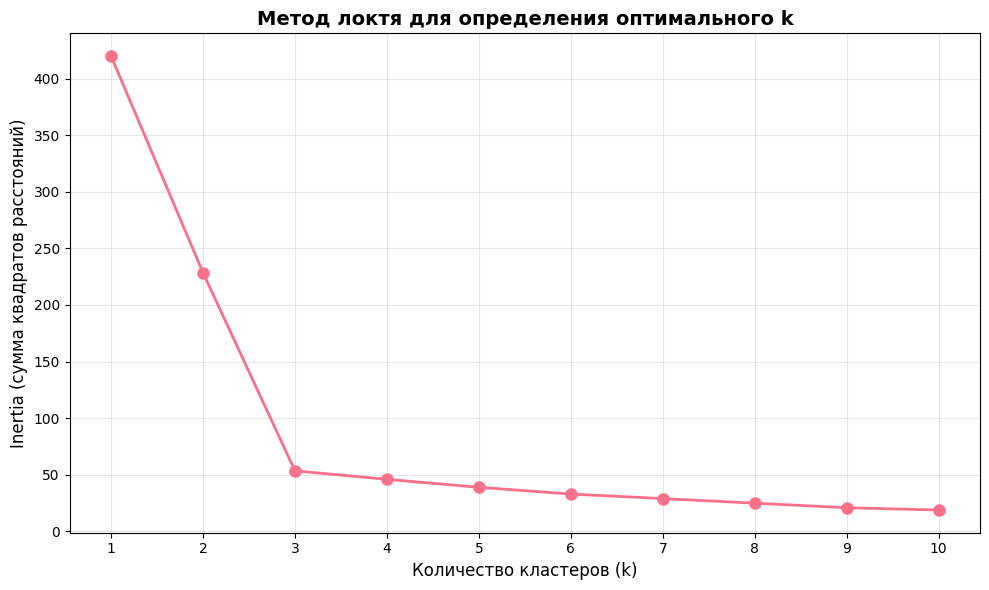

In [13]:
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=0, n_init=20)
    kmeans_temp.fit(scaled_data)
    inertia_values.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (k)', fontsize=12)
plt.ylabel('Inertia (сумма квадратов расстояний)', fontsize=12)
plt.title('Метод локтя для определения оптимального k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

График показывает изгиб ("локоть") в районе k=3, что подтверждает оптимальность выбора 3 кластеров.

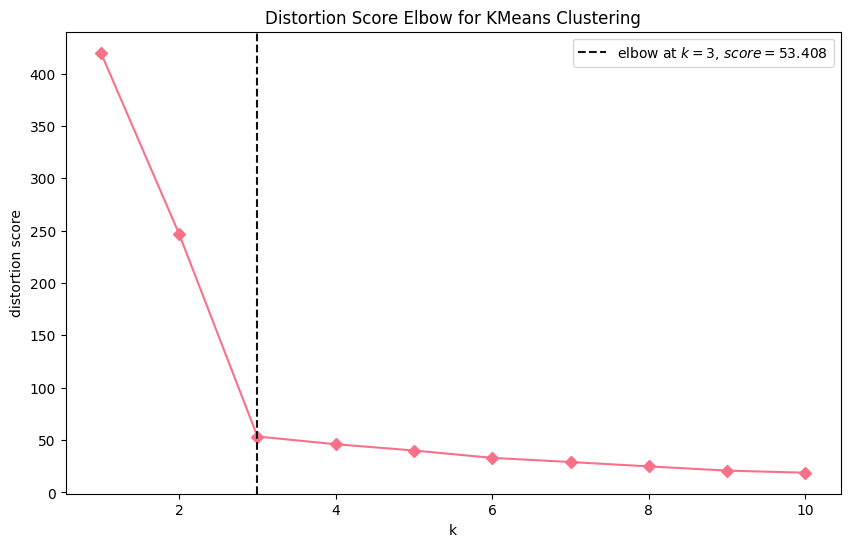

In [14]:
plt.figure(figsize=(10, 6))
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(scaled_data)
visualizer.show()

optimal_k = visualizer.elbow_value_

KElbowVisualizer автоматически определил оптимальное k=3, что совпадает с нашими наблюдениями.

---

Далее был проведен анализ силуэтов разного количества кластеров

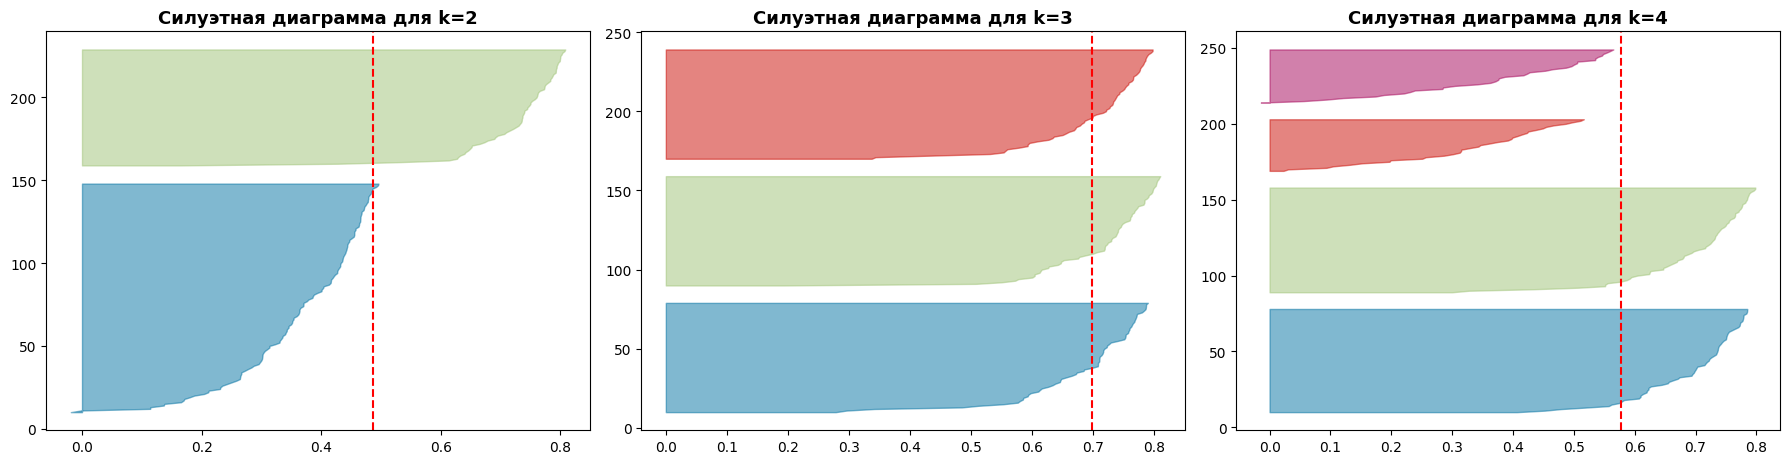

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate([2, 3, 4]):
    ax = axes[idx]

    model = KMeans(n_clusters=k, random_state=0, n_init=20)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax)
    visualizer.fit(scaled_data)

    ax.set_title(f'Силуэтная диаграмма для k={k}', fontsize=13, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Силуэтные диаграммы показывают:
- **k=2**: Кластеры неравномерные по размеру, один кластер объединяет несколько истинных групп
- **k=3**: Все кластеры примерно одинаковые по размеру и плотности, силуэты широкие и превышают среднюю линию
- **k=4**: Один из кластеров слишком маленький, есть объекты с отрицательными значениями силуэта (плохо кластеризованы)

Для k=3 все силуэты хорошо сбалансированы и превышают среднее значение, что подтверждает оптимальность выбора.

---

### Выводы по первой части

Создали синтетический датасет с 3 кластерами (по 70 объектов в каждом, всего 240 точек). Применили K-means с разным количеством кластеров (k = 2, 3, 4).

**Результаты экспериментов:**

1. **k=2 (недостаточно кластеров):**
   - Silhouette Score ниже чем при k=3
   - Алгоритм объединил несколько истинных групп в один кластер
   - На силуэтной диаграмме видна неравномерность размеров кластеров

2. **k=3 (оптимально):**
   - Наивысший Silhouette Score среди всех вариантов
   - Алгоритм точно определил истинное количество групп
   - Силуэтная диаграмма показывает сбалансированные кластеры
   - Все силуэты широкие и превышают среднее значение
   - Центры кластеров расположены правильно

3. **k=4 (избыточно):**
   - Silhouette Score ниже чем при k=3
   - Один из истинных кластеров разбился на 2 части
   - На силуэтной диаграмме видны маленькие кластеры и отрицательные значения силуэта

**Методы определения оптимального k:**
- **Метод локтя (Elbow Method):** показал изгиб в районе k=3
- **KElbowVisualizer:** автоматически определил k=3
- **Silhouette Score:** максимум достигнут при k=3
- **SilhouetteVisualizer:** визуально подтвердил, что k=3 дает наиболее сбалансированные и плотные кластеры

**Вывод:** Все методы согласованно указали на k=3 как оптимальное значение, что соответствует истинной структуре данных. K-means успешно справился с задачей кластеризации синтетических данных.

---


### Часть 2

Данные содержат информацию о болезнях:

- age — возраст пациента (лет), числовой.
- sex — пол: Male / Female, категориальный.
- BMI — индекс массы тела (кг/м²), числовой.
- systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.
- cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.
- fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.
- smoking_status — статус курения: Never / Former / Current, категориальный.
- family_history — наследственность по заболеванию: Yes / No, категориальный.
- activity_level — уровень физической активности: Low / Moderate / High,
- категориальный.
- symptom_score — суммарная выраженность симптомов (0–10), числовой.
- CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.
- WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.
- ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH, категориальный.
- Disease — целевой класс: 1 — болеет, 0 — не болеет.


In [16]:
df = pd.read_csv('medical_diagnosis.csv')

display(df.head(10))
df.info()
df.describe()

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0
5,43,Male,13.5,136.0,171.0,91.0,Never,No,Low,1.3,0.10,5.05,ST-T abnormality,0
6,76,Female,26.2,110.0,269.0,140.0,Current,Yes,Moderate,2.7,2.92,7.91,ST-T abnormality,0
7,24,Female,30.0,162.0,189.0,112.0,Never,Yes,High,2.1,0.80,7.71,LVH,0
8,83,Male,25.7,107.0,215.0,110.0,Never,No,Moderate,2.7,2.60,9.17,Normal,0
9,41,Female,21.5,156.0,188.0,120.0,Never,No,High,1.1,0.10,10.15,Normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,53.176509,26.465886,122.417684,202.744903,94.366216,2.040185,1.380625,6.825094,0.016166
std,20.740090,5.869822,17.859825,53.735636,19.547096,1.357714,3.159757,1.980929,0.126136
min,18.000000,13.500000,82.000000,85.000000,56.000000,0.000000,0.100000,2.300000,0.000000
25%,35.000000,22.500000,110.000000,171.000000,80.500000,1.000000,0.100000,5.480000,0.000000
50%,53.000000,26.300000,122.000000,200.000000,94.000000,2.000000,0.520000,6.750000,0.000000
75%,71.000000,30.400000,134.000000,232.000000,107.000000,3.000000,1.460000,8.150000,0.000000
max,89.000000,50.900000,184.000000,658.200000,163.000000,6.800000,43.450000,13.720000,1.000000


Были просмотрены основные данные о датасете

In [17]:
df.isna().sum()

age                      0
sex                      0
BMI                      0
systolic_bp              0
cholesterol_mg_dl        0
fasting_glucose_mg_dl    0
smoking_status           0
family_history           0
activity_level           0
symptom_score            0
CRP_mg_L                 0
WBC_10e9_L               0
ECG_result               0
Disease                  0
dtype: int64

Пустых объектов не было найдено

In [18]:
cat_cols = ['sex', 'smoking_status', 'family_history', 'activity_level', 'ECG_result']

for col in cat_cols:
    print(col, df[col].unique())


sex ['Male' 'Female']
smoking_status ['Current' 'Never' 'Former']
family_history ['No' 'Yes']
activity_level ['High' 'Moderate' 'Low']
ECG_result ['Normal' 'ST-T abnormality' 'LVH']


Переменные в столбах корректны

---


Для начала были созданы списки с числовыми и категориальными данными для дальнейшей более простой работы с ними.

In [19]:
numeric_cols = ['age', 'BMI', 'systolic_bp', 'cholesterol_mg_dl', 'fasting_glucose_mg_dl',
            'symptom_score', 'CRP_mg_L', 'WBC_10e9_L']
categorical_cols = ['sex', 'smoking_status', 'family_history', 'activity_level', 'ECG_result']

Выделение целевой переменной

<Figure size 2000x1400 with 0 Axes>

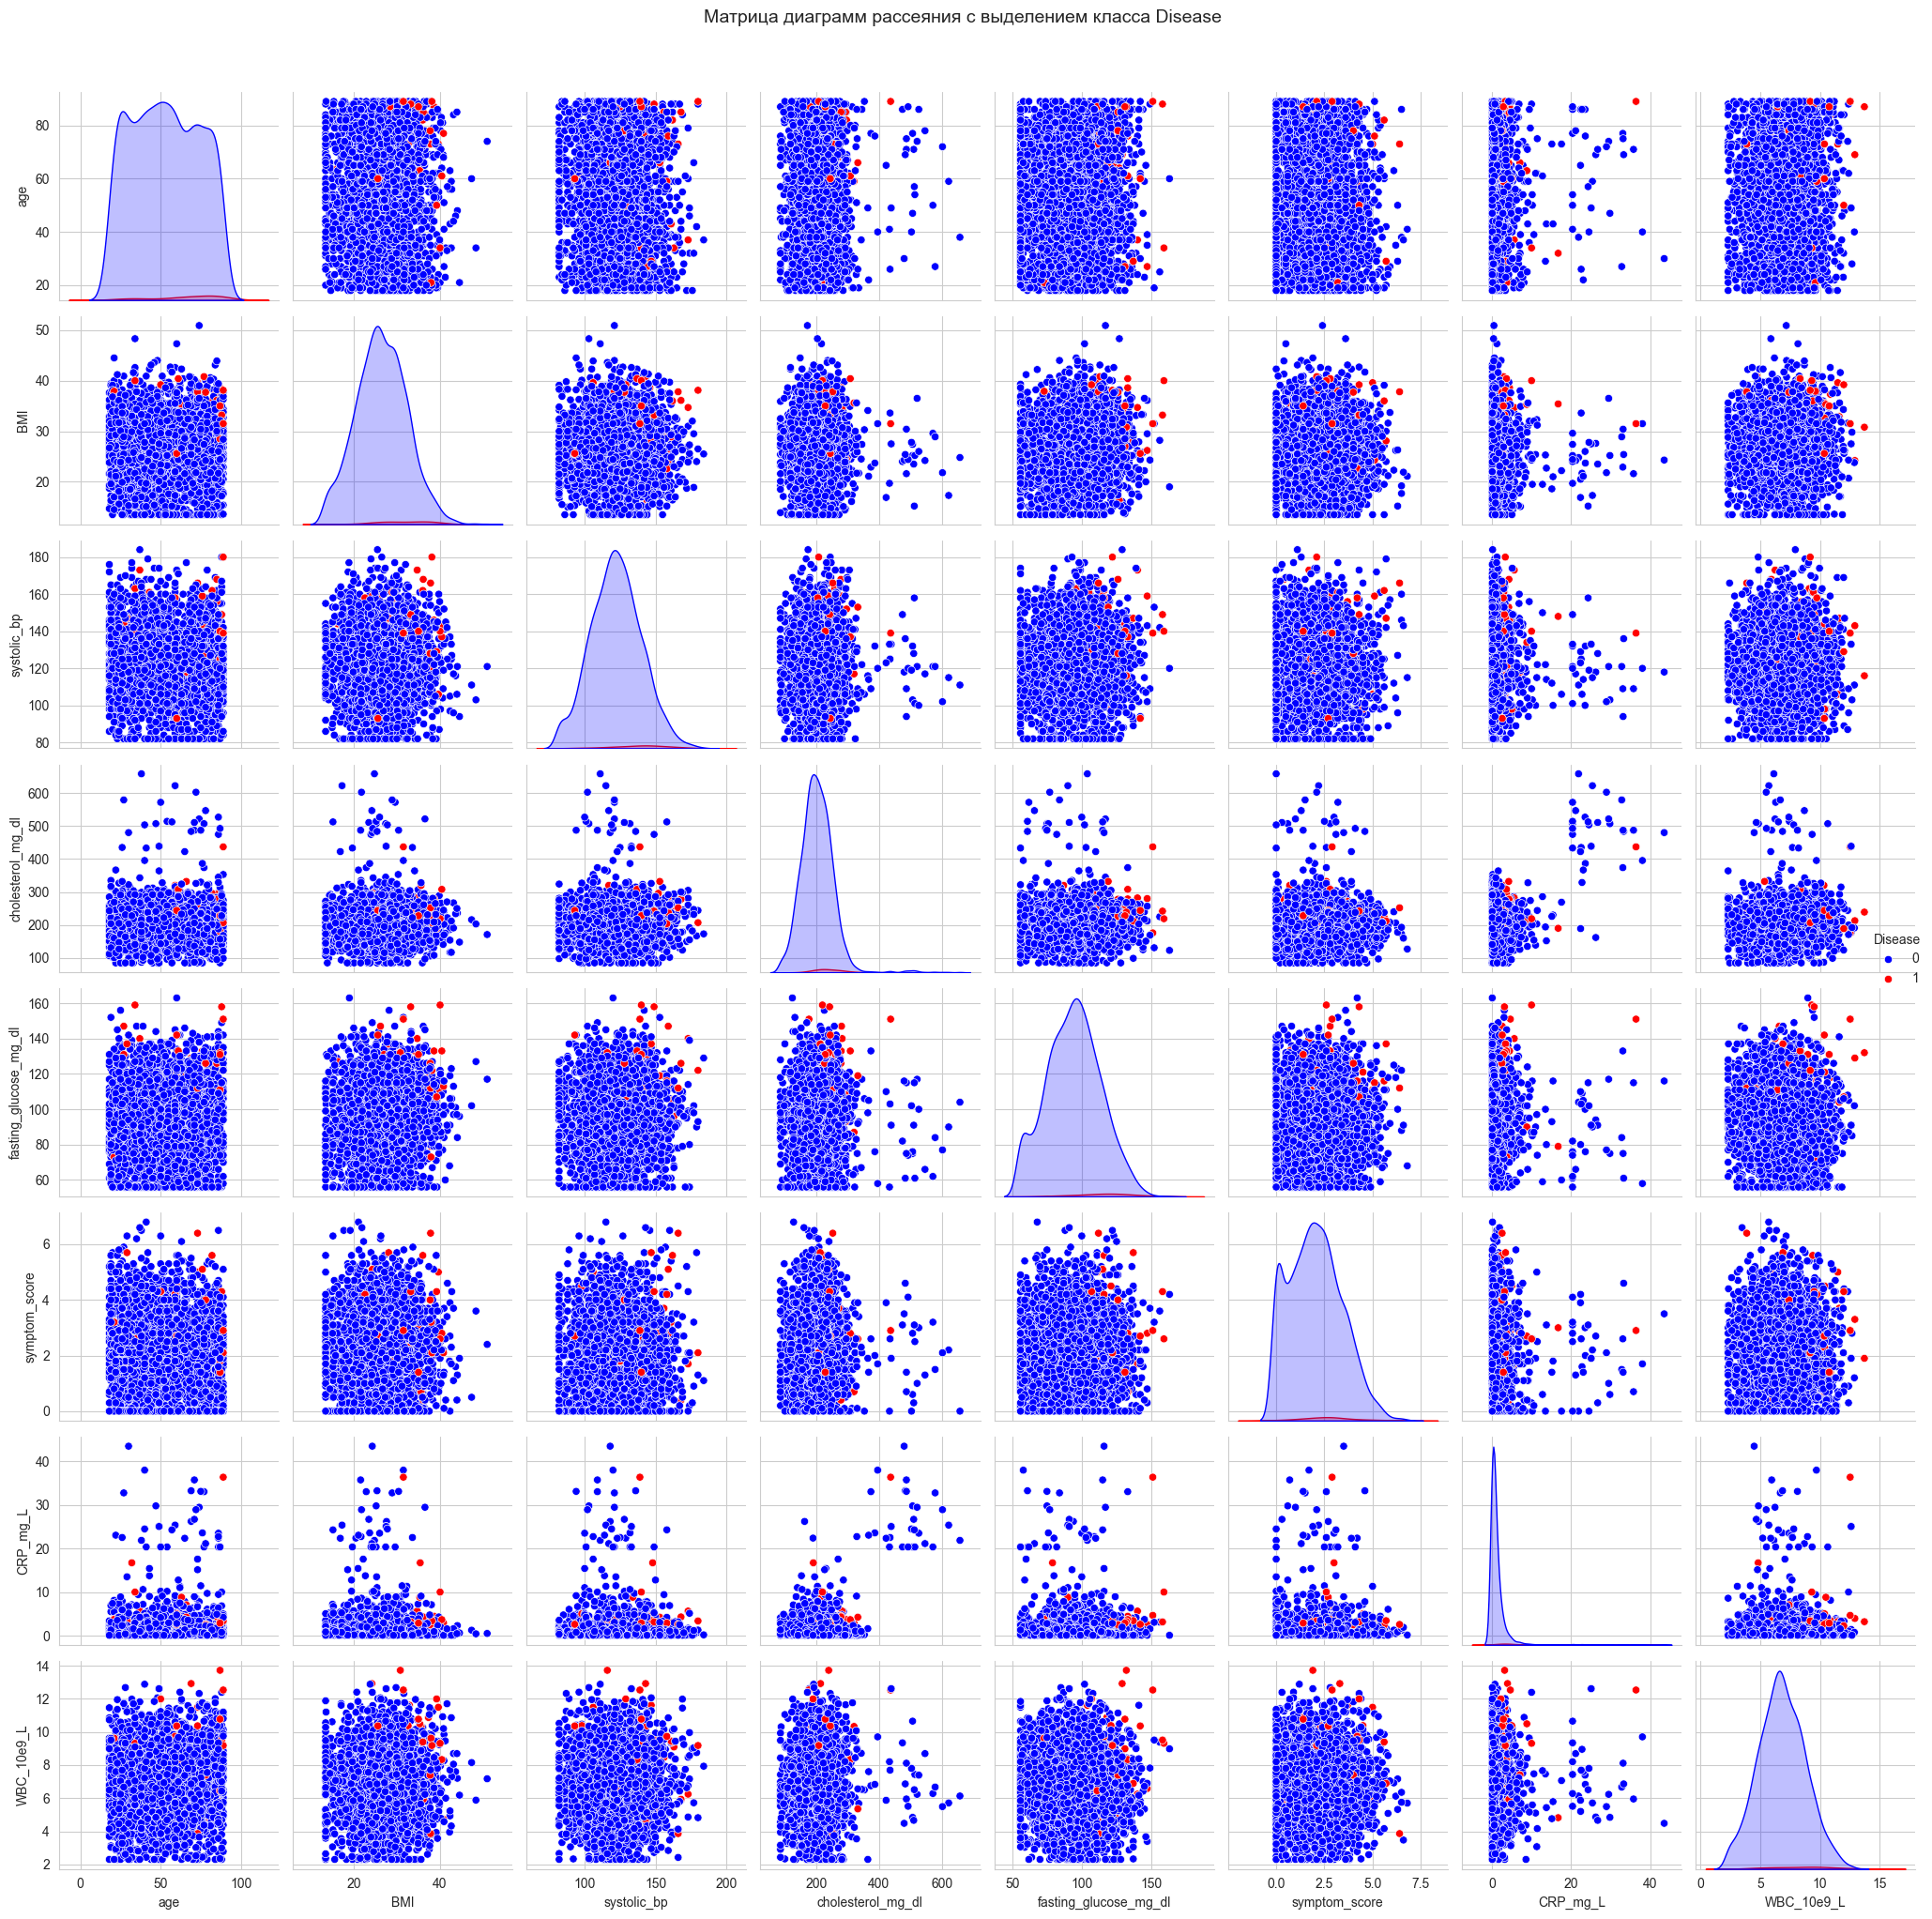

In [20]:
df_without_feature = df.drop(columns=["Disease"])

plt.figure(figsize=(20,14))
sns.set_style("whitegrid")
sns.pairplot(df[numeric_cols + ["Disease"]], hue="Disease",  palette={0: 'blue', 1: 'red'}, diag_kind="kde")
plt.suptitle("Матрица диаграмм рассеяния с выделением класса Disease", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


В ходе анализа графиков оказалось, что особой связи между признаками не наблюдается.

Затем было проведено преобразование категориальных признаков в числовые.

In [21]:
df_dumb = pd.get_dummies(df_without_feature, columns=categorical_cols, drop_first=True)

Была проведена стандартизация данных.

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dumb)
scaled_df = pd.DataFrame(scaled_data, columns=df_dumb.columns)
display(scaled_df.head(10))

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,sex_Male,smoking_status_Former,smoking_status_Never,family_history_Yes,activity_level_Low,activity_level_Moderate,ECG_result_Normal,ECG_result_ST-T abnormality
0,-0.924763,-1.646980,0.536618,-0.125541,-0.837409,-1.355579,-0.253424,0.896145,0.993095,-0.661707,-1.016299,-0.712713,-0.728035,-0.908187,0.521977,-0.460869
1,-1.407001,0.465868,-0.247394,-0.386119,0.083596,0.854382,0.423955,-0.143943,-1.006953,-0.661707,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869
2,-1.648120,-1.698097,-0.079391,1.214573,0.339430,1.296374,-0.380037,-0.108600,-1.006953,-0.661707,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869
3,1.727543,-1.885528,-0.303395,-1.242303,0.083596,0.412390,0.142242,-0.583203,-1.006953,-0.661707,0.983962,-0.712713,1.373560,-0.908187,0.521977,-0.460869
4,0.618397,-1.664019,-2.263424,0.712030,1.618604,1.075378,-0.069835,-2.102943,0.993095,1.511244,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869
5,-0.490749,-2.209270,0.760621,-0.590858,-0.172239,-0.545260,-0.405359,-0.896240,0.993095,-0.661707,0.983962,-0.712713,1.373560,-0.908187,-1.915793,2.169815
6,1.100634,-0.045305,-0.695401,1.233186,2.334941,0.486055,0.487262,0.547766,-1.006953,-0.661707,-1.016299,1.403089,-0.728035,1.101094,-1.915793,2.169815
7,-1.407001,0.602181,2.216643,-0.255830,0.902267,0.044063,-0.183787,0.446786,-1.006953,-0.661707,0.983962,1.403089,-0.728035,-0.908187,-1.915793,-0.460869
8,1.438201,-0.130500,-0.863403,0.228100,0.799933,0.486055,0.385972,1.183936,0.993095,-0.661707,0.983962,-0.712713,-0.728035,1.101094,0.521977,-0.460869
9,-0.587197,-0.846142,1.880638,-0.274442,1.311602,-0.692590,-0.405359,1.678735,-1.006953,-0.661707,0.983962,-0.712713,-0.728035,-0.908187,0.521977,-0.460869


Был построен график методом "локтя". 

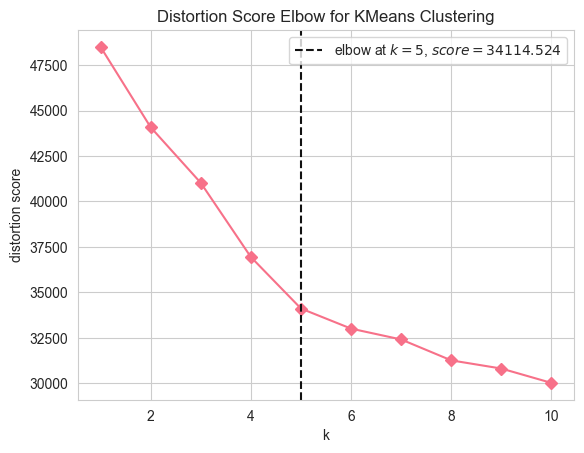

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
model = KMeans(n_clusters=2, random_state=0)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(scaled_df)
visualizer.show()

На графике видно, что точка "локтя" достигается при k=5. Это означает, что при k = 5 достигается оптимальный баланс между качеством кластеризации и количеством кластеров.

Модель была обучена кластеризации методом KMeans для 5 кластеров.

In [24]:
model = KMeans(n_clusters=5, random_state=0)
cluster_labels = model.fit_predict(scaled_df)
scaled_dff = scaled_df.copy()
scaled_dff['cluster'] = cluster_labels
scaled_dff

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,sex_Male,smoking_status_Former,smoking_status_Never,family_history_Yes,activity_level_Low,activity_level_Moderate,ECG_result_Normal,ECG_result_ST-T abnormality,cluster
0,-0.924763,-1.646980,0.536618,-0.125541,-0.837409,-1.355579,-0.253424,0.896145,0.993095,-0.661707,-1.016299,-0.712713,-0.728035,-0.908187,0.521977,-0.460869,0
1,-1.407001,0.465868,-0.247394,-0.386119,0.083596,0.854382,0.423955,-0.143943,-1.006953,-0.661707,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869,2
2,-1.648120,-1.698097,-0.079391,1.214573,0.339430,1.296374,-0.380037,-0.108600,-1.006953,-0.661707,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869,2
3,1.727543,-1.885528,-0.303395,-1.242303,0.083596,0.412390,0.142242,-0.583203,-1.006953,-0.661707,0.983962,-0.712713,1.373560,-0.908187,0.521977,-0.460869,0
4,0.618397,-1.664019,-2.263424,0.712030,1.618604,1.075378,-0.069835,-2.102943,0.993095,1.511244,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.635421,0.227321,-0.191393,5.596002,0.390597,-1.502909,7.311698,0.492227,-1.006953,-0.661707,-1.016299,-0.712713,-0.728035,1.101094,-1.915793,2.169815,3
3027,0.184383,-1.919606,1.992639,5.763516,1.055768,0.780717,7.245226,-0.159090,-1.006953,-0.661707,0.983962,1.403089,1.373560,-0.908187,-1.915793,-0.460869,3
3028,-0.587197,-1.152846,0.592618,4.289390,-1.963082,-1.502909,6.004420,0.694186,0.993095,1.511244,-1.016299,1.403089,-0.728035,1.101094,0.521977,-0.460869,3
3029,1.052411,0.670338,-1.591414,5.294476,-0.990910,-0.471594,10.037041,0.648745,0.993095,1.511244,-1.016299,-0.712713,-0.728035,1.101094,0.521977,-0.460869,3


Затем были подсчитаны средние показатели по каждому кластеру.

In [25]:
df_cl = df.copy()
df_cl['cluster'] = cluster_labels
cluster_means = df_cl.groupby('cluster')[numeric_cols + ['Disease']].mean()
cluster_means

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
cluster,,,,,,,,,
0,53.480519,26.221861,122.254329,199.443723,94.134199,2.042316,1.116829,6.843247,0.014069
1,52.712418,26.539477,122.383007,198.515033,95.267974,2.068366,1.095307,6.914523,0.023529
2,52.170513,26.542436,122.219231,200.139744,93.684615,1.997051,1.096372,6.710987,0.010256
3,61.647059,25.041176,120.441176,460.700000,90.000000,2.070588,26.277794,7.387941,0.029412
4,54.257576,26.764962,123.174242,201.888258,94.753788,2.057386,1.072348,6.796080,0.017045


1) Кластер 3 резко отличается от остальных: 
    - Холестерин (460.7 мг/дл) больше чем в 2 раза, чем в других кластерах, где он около 200 мг/дл. 
    - CRP (26.28 мг/л) больше чем в 20 раз, по сравнению с остальными кластерами (1.1 мг/л). 
    - Возраст (61.65) самый высокий среди кластеров. 
    - BMI (25.04) ниже, чем в других кластерах, кроме кластера 0. 
    - WBC (7.39 × 10^9/л) также немного выше, чем в остальных кластерах.

2) Кластеры 0, 1, 2, 4 — относительно однородная группы.

`Общие выводы по этой части:`
- Самый низкий показатель Disease у кластера 2: 0.010256. 
- Самый высокий показатель - у кластера 3: 0.029412. 
- Скорее всего, 3 кластер описывает людей с самой высокой выраженностью симптомов (symptom_score) и с самым высоким показателем целевой переменной (то есть Disease - наличие/отсутствие заболевания).

In [35]:
for cluster in range(5):
    cluster_data = df_cl[df_cl['cluster'] == cluster]
    print(f"\nКластер {cluster} (размер: {len(cluster_data)})")
    print(f"Доля болеющих: {cluster_data['Disease'].mean():.3f}")
    print(f"Средний возраст: {cluster_data['age'].mean():.1f}")
    print(f"Средний ИМТ: {cluster_data['BMI'].mean():.1f}")
    print(f"Средняя выраженность симптомов: {cluster_data['symptom_score'].mean():.1f}")


Кластер 0 (размер: 924)
Доля болеющих: 0.014
Средний возраст: 53.5
Средний ИМТ: 26.2
Средняя выраженность симптомов: 2.0

Кластер 1 (размер: 765)
Доля болеющих: 0.024
Средний возраст: 52.7
Средний ИМТ: 26.5
Средняя выраженность симптомов: 2.1

Кластер 2 (размер: 780)
Доля болеющих: 0.010
Средний возраст: 52.2
Средний ИМТ: 26.5
Средняя выраженность симптомов: 2.0

Кластер 3 (размер: 34)
Доля болеющих: 0.029
Средний возраст: 61.6
Средний ИМТ: 25.0
Средняя выраженность симптомов: 2.1

Кластер 4 (размер: 528)
Доля болеющих: 0.017
Средний возраст: 54.3
Средний ИМТ: 26.8
Средняя выраженность симптомов: 2.1


**`Вывод по каждому кластеру`**
- Кластер 0 — самая крупная группа, представляет пациентов среднего возраста с небольшим избытком массы тела, умеренной симптоматикой и низкой долей болеющих.

- Кластер 1 — группа с заметно повышенной долей болеющих при средних возрасте и ИМТ.

- Кластер 2 — самая благополучная группа с минимальным количеством заболевших. Самый молодой средний возраст, вероятно, является ключевым защитным фактором, компенсирующим повышенный ИМТ.

- Кластер 3 — малая, но критически важная группа высокого риска. Отличается самым старшим возрастом и самой высокой долей болеющих, несмотря на нормальный ИМТ, что указывает на возраст как на главный фактор риска.

- Кластер 4 — компактная группа пациентов с самым высоким ИМТ, но средним возрастом и умеренным риском.

---

**Метрики качества**

- `ARI (Adjusted Rand Index)` - измеряет сходство между полученными метками и
базовыми метками, которые были установлены заранее, игнорируя перестановки.

- `AMI (Adjusted Mutual Information)` - оценка на основе взаимной информации,
которая измеряет согласованность двух назначений, вычисляется с использованием функции энтропии/

- `FMI (Индекс Фаулкса-Мэллоуса)` - для определения сходства между кластерами.

- `Completeness (полнота)` - показывает, насколько все объекты одного класса относятся к одному кластеру.

- `Homogenity (однородность)` - описывает, насколько каждый кластер состоит из
объектов одного класса, для её вычисления необходимо определить условную
энтропию разбиения и энтропию класса.

- `Silhouette (коэффициент силуэта)` - показывает, насколько
похож объект на другие объекты своего кластера.

In [27]:
ari = metric.adjusted_rand_score(df['Disease'], cluster_labels)
ami = metric.adjusted_mutual_info_score(df['Disease'], cluster_labels)
fmi = metric.fowlkes_mallows_score(df['Disease'], cluster_labels)
completeness = metric.completeness_score(df['Disease'], cluster_labels)
silhouette = metric.silhouette_score(scaled_df, cluster_labels)
homogeneity = metric.homogeneity_score(df['Disease'], cluster_labels)

print(f'ARI: {ari}')
print(f'AMI: {ami}')
print(f'FMI: {fmi}')
print(f'Completeness: {completeness}')
print(f'Silhouette: {silhouette}')
print(f'Homogeneity: {homogeneity}')


ARI: 0.00048319217888719647
AMI: 0.00016431909600702257
FMI: 0.4953631619680027
Completeness: 0.0005658820775607585
Silhouette: 0.11502671026330472
Homogeneity: 0.009671421727057204


**Выводы по метрикам**

Все метрики демонстрируют плохое качество кластеризации. 

- Completeness (0.0005) указывает на очень низкую полноту, 
- Homogenity (0.0097) - почти нулевая однородность. 
- ARI (0.00048) и AMI (0.00016) также близки к нулю, это означает, что метки не сходны, нет взаимной согласованности. 
- Единственная относительно приемлемая метрика - FMI (0.495), которая означает, что кластеры имеют схожесть, но FMI часто завышает результат для несбалансированных кластеров. 
- Коэффициент силуэта (0.115) также очень мал.

Данные результаты можно объяснить тем, что в датасете большое количество наблюдений и категориальных признаков, поэтому можно сделать вывод, что KMeans плохо подходит для кластеризации в данном случае

---

Затем необходимо выполнить кластеризацию иерархическим агломеративным методом, выбрать оптимальное количество кластеров, подсчитать средние показатели по каждому признаку каждого кластера и метрики, а также построить дендрограмму.

Сначала модель была обучена агломеративной кластеризации, были выведены метки кластеров.

In [28]:
model_ac = AgglomerativeClustering(n_clusters=5)
model_ac.fit(scaled_df)
pred = model_ac.fit_predict(scaled_df)
print(model_ac.labels_)

[0 0 0 ... 3 3 3]


Далее был построен график метода "локтя" для определения оптимального количества кластеров.

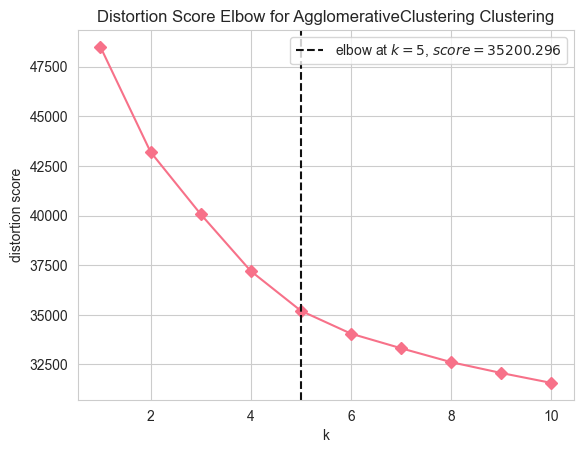

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
visualizer = KElbowVisualizer(model_ac, k=(1,11), timings=False)
visualizer.fit(scaled_df)
visualizer.show()

На графике четко виден "излом" при k=5 со значением distortion score = 35200.296. После этого точки уменьшение метрики замедляется. Значит до 5 кластеров каждая новая группа существенно улучшает компактность кластеров, а после 5 - добавление новых кластеров дает лишь незначительное улучшение за счет избыточного дробления данных

---

Была построена дендрограмма

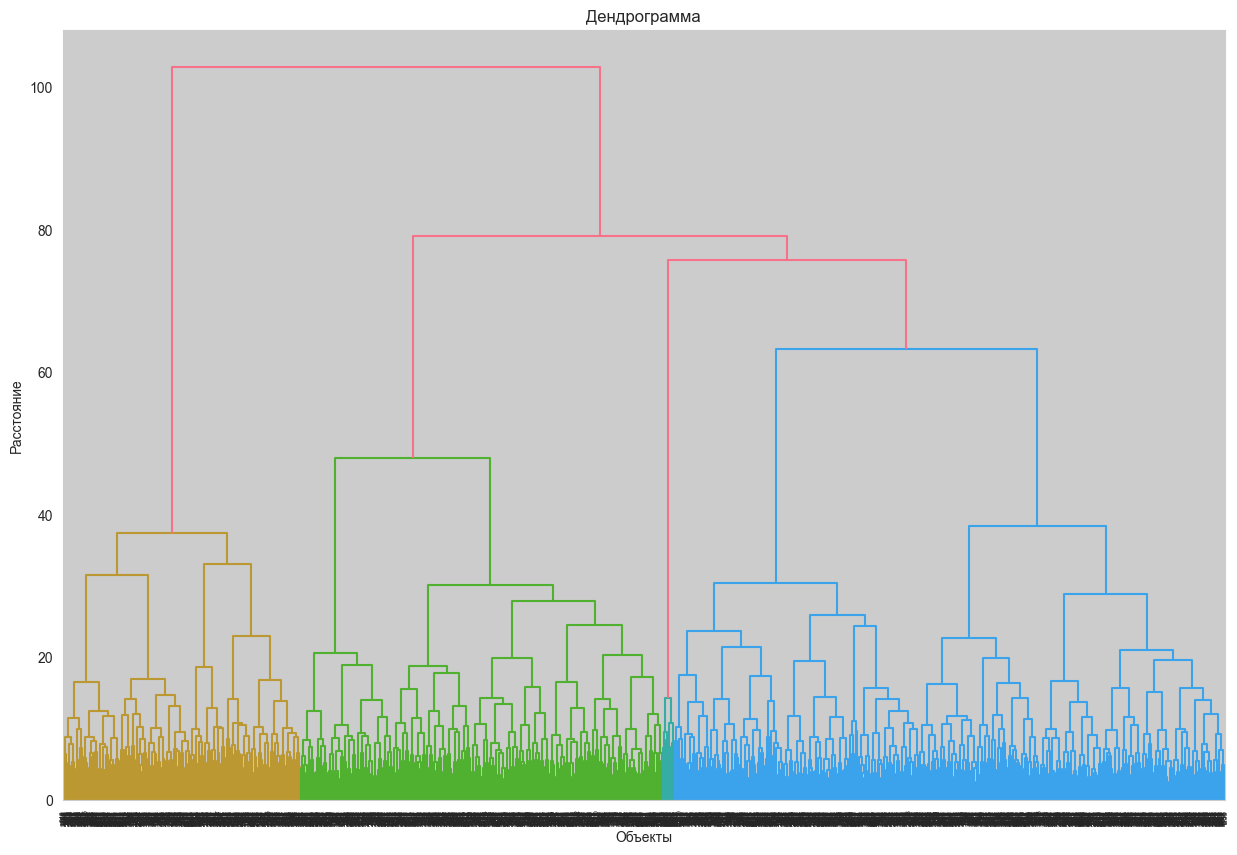

In [30]:
linkage_matrix = linkage(scaled_df, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, orientation='top')
plt.title('Дендрограмма')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

Дендрограмма демонстрирует результаты иерархической кластеризации. По вертикальной оси отложено расстояние, по горизонтальной — объекты. 

- Красный кластер (верхняя часть) — самый крупный, объединяет множество объектов на максимальном расстоянии (~100). Это базовый уровень агрегации, где большинство объектов сгруппировано. 

- Зеленый кластер (в центре) — промежуточный уровень кластеризации (~45–50 по оси расстояние). Здесь объекты объединены в более мелкие группы, чем в синем кластере. 

- Синий кластер (правая часть) — ещё один крупный блок, объединяющий объекты на уровне ~60–65 по оси расстояние. 

- По левой части расположен еще один кластер желтого цвета, объединяющий объекты на уровне ~40 по оси расстояние. 

- Также имеется мелкий кластер фиолетового зелено-синего (объединяет объекты на уровне ~15 по оси расстояние).

In [31]:
model_ac = AgglomerativeClustering(n_clusters=5)
model_ac.fit(scaled_df)
pred = model_ac.fit_predict(scaled_df)

Затем было выведено количество объектов в каждом кластере и средние значения каждого признака по каждому кластеру.

In [32]:
df_with_clusters = df.copy()
df_with_clusters['cluster'] = model_ac.labels_
means_by_cluster = df_with_clusters.groupby('cluster').mean(numeric_only=True)
means_by_cluster

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
cluster,,,,,,,,,
0,53.423729,26.360064,122.179025,196.193856,94.419492,2.083263,1.054004,6.835890,0.016949
1,54.283414,26.712077,123.584541,202.188406,94.795491,2.043317,1.063800,6.772110,0.012882
2,52.570891,26.701757,121.611041,202.140527,93.573400,2.029486,1.019711,6.761769,0.012547
3,60.258065,25.196774,120.709677,485.283871,91.161290,2.048387,26.687258,7.550645,0.032258
4,52.145768,26.149843,122.725705,200.006270,95.015674,1.986364,1.393511,6.904545,0.021944


**Выводы по кластерам**

- Кластер 3 — группа высокого риска: пожилые пациенты с крайне высоким холестерином (485 мг/дл) и высоким CRP (26.7 мг/л), самая высокая доля заболевших (3.2%). 

- Кластер 1 — пациенты с самым высоким ИМТ (26.7) и давлением (123.6), но низким уровнем заболевших (1.3%). 

- Кластер 0 — базовая группа со средними показателями. 

- Кластер 2 — самая здоровая группа с низким давлением, CRP и самым низким уровнем заболевших (1.3%). 

- Кластер 4 — молодые пациенты с повышенными CRP и глюкозой, умеренным количеством заболевших (2.2%).

In [33]:
display(df_with_clusters['cluster'].value_counts())

cluster
0    944
2    797
4    638
1    621
3     31
Name: count, dtype: int64

**Можно сделать следующие выводы:**

- Самый маленький по численности кластер - кластер 3. 
- Самый большой - кластер 0. 
- Кластеры 4 и 1 примерно одинаковы по размеру.

Были подсчитаны метрики качества

In [34]:
sil_aggl = metric.silhouette_score(scaled_df, model_ac.labels_)
print(f'Коэффициент силуэта: {sil_aggl}')
print('ARI (agglom):', metric.adjusted_rand_score(df['Disease'], model_ac.labels_))
print('AMI (agglom):', metric.adjusted_mutual_info_score(df['Disease'], model_ac.labels_))
print('FMI (agglom):', metric.fowlkes_mallows_score(df['Disease'], model_ac.labels_))
print('Homogeneity (agglom):', metric.homogeneity_score(df['Disease'], model_ac.labels_))
print('Completeness (agglom):', metric.completeness_score(df['Disease'], model_ac.labels_))

Коэффициент силуэта: 0.09503691510614123
ARI (agglom): 0.00028279834900924074
AMI (agglom): -0.00028280664121772744
FMI (agglom): 0.4944324196106451
Homogeneity (agglom): 0.005576608199793574
Completeness (agglom): 0.00032617175616329733


`Метрики показали очень плохое качество кластеризации.` 

- Коэффициент силуэта (0.108) - очень низкое значение, то есть кластеры имеют очень слабую внутреннюю структуру. 

- ARI (Adjusted Rand Index): -0.0004, означает, что случайное совпадение хуже, чем ожидалось. 

- AMI (Adjusted Mutual Information): -0.0006, значит, что нет статистически значимой связи между кластерами и истинными метками. 

- Homogeneity: 0.0018 - практически нулевая: кластеры не содержат точки только одного класса. 

- Completeness: 0.00014 - почти нулевая, точки одного класса распределены по разным кластерам

`Можно сделать вывод, что агломеративная кластеризация не подходит для этих данных.`

---

## Вывод

В ходе выполнения данной лабораторной работы были изучены алгоритмоы и методы кластеризации на практике. `В первой части` был создан набор данных, проведена стандартизация данных и затем с помощью fit_predict модель была обучена кластеризации методом KMeans для трех кластеров, получены метки кластеров. Далее была произведена визуализация кластеров с помощью scatter и был посчитан коэффициент силуэта. Те же действия были проведены для моделей с количеством кластеров: 2 и 4. Также был построен график по методу "локтя". Исходя из этого графика и сравнения коэффициента силуэта для 3 моделей с различным числом кластеров было выяснено, что оптимальное число кластеров для исходного набора данных - 3 кластера.

`Во второй части` был загружен датасет по варианту. `Для 16 (1) варианта - это medical_diagnosis.csv`, в котором содержится информация о болезнях. `Целевой признак - Disease (наличие/отсутствие болезни).` Была построена матрица диаграмм рассеяния, по ней сделан вывод, что особой зависимости между признаками нет. Затем числовые данные были стандартизированы, категорильные признаки были преобразованы с помощью get_dummies. Затем была проведена кластеризация методом KMeans, было подобравно оптимальное количество кластеров при помощи графика методом "локтя". Далее было выведено количество объектов в каждом кластере, были посчитаны средние показатели по каждому признаку каждого кластера. Также были высчитаны метрики качества, которые показали плохие результаты (коэффициент силуэта = 0.11), что означает, что `KMeans не подходит для данных`. Затем была `проведена кластеризация иерархическим агломеративным методом`. С помощью графика методом "локтя" было определено оптимальное количество кластеров - 5. Была построена дендрограмма. Также были подсчитаны средние показатели по каждому признаку каждого кластера. И вычислены мерики качества, которые показали `результаты еще хуже, чем при класеризации методом KMeans` (коэффициент силуэта = 0.095). Можно сделать вывод, что `кластеризация агломеративным методом также плохо подходит для исходного набора данных.`

### Дополнительные задания